# Bias Trends

In [1]:
%matplotlib widget

In [2]:
# imports
from importlib import reload
import numpy as np
import os

import h5py

import pandas

import seaborn as sns
from matplotlib import pyplot as plt

from ulmo.mae import bias
from ulmo.mae import mae_utils

# Files

In [3]:
enki_path = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki')

In [4]:
orig_file = os.path.join(enki_path, 'PreProc', 'MAE_LLC_valid_nonoise_preproc.h5')

In [5]:
f_orig = h5py.File(orig_file, 'r')

In [6]:
reload(mae_utils)
t, p = 75, 10
recon_file = mae_utils.img_filename(t,p, local=True)
f_recon = h5py.File(recon_file,'r')

# Calculate the bias

In [28]:
reload(bias)
median_bias, mean_bias = bias.measure_bias(f_orig, f_recon)
median_bias.size

655788

# Correlate me

In [17]:
llc_tbl_file = os.path.join(enki_path, 'Tables', 'MAE_LLC_valid_nonoise.parquet')
llc_tbl = pandas.read_parquet(llc_tbl_file)

In [21]:
llc_tbl[1000:1100]

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,...,LL_t10_p10,LL_t10_p20,LL_t10_p30,LL_t10_p40,LL_t10_p50,LL_t35_p10,LL_t35_p20,LL_t35_p30,LL_t35_p40,LL_t35_p50
1000,54.345779,-50.156250,11252,16664,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,229955,...,-191.921265,-196.330933,-181.952820,-176.569885,-162.086609,-196.648315,-196.492371,-178.868530,-186.729004,-169.048828
1001,54.345779,-49.218750,11252,16709,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,283308,...,41.433716,35.623047,49.074341,39.213013,49.705811,21.107910,46.197693,47.407959,62.348145,57.312805
1002,54.345779,-48.281250,11252,16754,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,120136,...,208.782959,203.840820,209.611694,204.894897,226.825317,197.599609,208.896362,206.791077,209.254150,217.910583
1003,54.345779,-47.343750,11252,16799,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,505678,...,156.259399,157.697754,166.526611,166.519287,170.326904,140.238708,154.915039,147.713013,161.911072,172.627808
1004,54.345779,-46.406250,11252,16844,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,668,...,138.274719,147.187500,152.421570,-7.425049,176.222473,117.940369,139.703613,145.235840,149.465637,158.906799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,53.961609,-177.677078,11219,10543,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,653350,...,556.656372,556.364319,553.040222,559.734985,559.667847,544.250061,553.629395,550.296997,570.557129,561.527344
1096,53.961609,-176.760422,11219,10587,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,370854,...,509.837891,506.596069,506.394165,517.253967,525.597168,500.050232,502.210632,502.107544,536.075317,522.285400
1097,53.961609,-175.822922,11219,10632,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,316843,...,446.278870,446.234497,445.714050,445.133667,460.607056,432.301819,442.167969,452.029785,457.897339,451.970581
1098,53.961609,-174.906250,11219,10676,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,381106,...,443.340332,449.275391,442.800293,443.764160,440.284119,437.277588,441.216309,448.739197,454.982788,466.063721


In [22]:
np.sum(llc_tbl.pp_idx >= 0)

655788

In [20]:
f_orig['valid'].shape

(655788, 1, 64, 64)

In [23]:
llc_tbl = llc_tbl[llc_tbl.pp_idx >= 0].copy()

## Reorder the bias values

In [29]:
median_bias = median_bias[llc_tbl.pp_idx]
mean_bias = mean_bias[llc_tbl.pp_idx]

In [32]:
llc_tbl['bias'] = mean_bias

In [33]:
llc_tbl.head()

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,...,LL_t10_p20,LL_t10_p30,LL_t10_p40,LL_t10_p50,LL_t35_p10,LL_t35_p20,LL_t35_p30,LL_t35_p40,LL_t35_p50,bias
8,56.642715,-179.489578,11455,10456,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,170686,...,299.012817,302.756042,298.496460,307.338135,295.663147,299.283936,313.300415,311.911865,322.112061,0.021002
9,56.642715,-178.489578,11455,10504,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,254068,...,199.893677,197.024353,203.142334,213.431519,185.846313,196.908752,187.559082,203.118774,228.070251,0.020644
10,56.642715,-177.489578,11455,10552,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,462018,...,160.267578,163.410767,167.850525,168.364258,148.482788,158.051270,164.441589,161.891846,176.772827,0.012069
11,56.642715,-176.510422,11455,10599,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,559545,...,181.416199,177.412354,175.369324,189.435059,174.824951,175.500244,177.849365,193.722900,204.234619,0.022669
12,56.642715,-175.489578,11455,10648,2011-09-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5,llc_144_nonoise,64,402050,...,226.181091,220.214294,231.398315,281.954102,211.199585,219.695312,230.321899,242.675842,226.747925,0.019926


## Write to speed things up for reanalysis

In [34]:
llc_tbl.to_parquet('llc_with_bias.parquet')

In [35]:
llc_tbl.keys()

Index(['lat', 'lon', 'row', 'col', 'datetime', 'filename', 'pp_file',
       'pp_root', 'field_size', 'pp_idx', 'pp_type', 'mean_temperature',
       'Tmin', 'Tmax', 'T90', 'T10', 'LL', 'LL_t75_p10', 'LL_t75_p20',
       'LL_t75_p30', 'LL_t75_p40', 'LL_t75_p50', 'LL_t10_p10', 'LL_t10_p20',
       'LL_t10_p30', 'LL_t10_p40', 'LL_t10_p50', 'LL_t35_p10', 'LL_t35_p20',
       'LL_t35_p30', 'LL_t35_p40', 'LL_t35_p50', 'bias'],
      dtype='object')

----

# Correlate me

/home/xavier/miniconda3/envs/os/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/xavier/miniconda3/envs/os/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


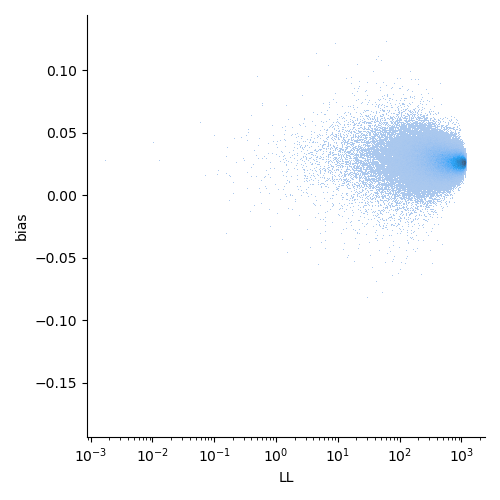

In [44]:
plt.clf()
ax = plt.gca()
sns.displot(data=llc_tbl, x='LL', y='bias', log_scale=(True,False), ax=ax)
plt.show()